 ## 상품명 : 미래에셋대우 공모 ELS 26005회 조기상환형 조건충족시 연 5%(세전) / 최대손실률 -100%
## 상품정보 : https://www.miraeassetdaewoo.com/ 접속 후 상품정보>ELS 검색에서 날짜 2018/06/08에 26005
## 기초지수 : HSECI - EUROSTOXX50

In [1]:
from scipy.stats import norm
import numpy as np
import pandas as pd
from scipy.sparse import diags
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

 # Operator Splitting FDM
 
 ## ● Implicit scheme in x variable only in first leg
 ## ● Implicit scheme in y variable only in second leg 
 ## ● Correlation and no derivative terms are averaged

\begin{align}
\ \frac{u_{n,l}^{m+1} - u_{n,l}^{m}}{\Delta t} = \frac{u_{n,l}^{m^\star} - u_{n,l}^{m}}{\Delta t} + \frac{u_{n,l}^{m+1} - u_{n,l}^{m^\star}}{\Delta t} =L_{OS}^{x} u_{n,l}^{m^\star} + L_{OS}^{y} u_{n,l}^{m+1}  \\
\ ( m^\star = m + \frac{1}{2}\delta \tau \ )
\\
\end{align}
 ## First Lag
\begin{align}
\\
\ L_{OS}^{x} u_{n,l}^{m^\star} \\\\= b_n u_{n-1, l}^{m^\star} + a_n u_{n, l}^{m^\star}\ + c_n u_{n+1, l}^{m^\star} = d_m \ 
\\
\\
\ a_n = 1+ \Delta t \times(\frac{1}{2}+ (r-d)n + (\sigma_y n)^2 ) \
\\
\ b_n = - \frac{ (\sigma_y n )^2 \Delta t}{2}
\\
\ c_n = - \frac{ (\sigma_y n )^2 \Delta t }{2} - rn \Delta t \
\\
\ d_{n,l}^m = u_{n,l}^m + \frac{\rho \sigma_y \sigma_x nl \Delta t }{8} (u_{n+1,l+1}^m + u_{n-1,l-1}^m - u_{n-1,l+1}^m - u_{n+1,l-1}^m )\
\end{align}

 ## Second Lag
\begin{align}
\\
\ L_{OS}^{y} u_{n,l}^{m+1} \\\\= b_l u_{n-1, l}^{m+1} + a_l u_{n, l}^{m+1}\ + c_l u_{n+1, l}^{m+1} = d_{m^\star} \ 
\\
\\
\ a_l = 1+ \Delta t\times(\frac{1}{2}+ (r-d)\bullet l + (\sigma_x \bullet l)^2 ) \
\\
\ b_l = - \frac{ (\sigma_x \bullet l )^2 \Delta t}{2}
\\
\ c_l = - \frac{ (\sigma_x \bullet l )^2 \Delta t}{2} - rl\Delta t \
\\
\ d_{n,l}^{m^\star} = u_{n,l}^{m^\star} + \frac{\rho \sigma_y \sigma_x nl\Delta t }{8} (u_{n+1,l+1}^{m^\star} + u_{n-1,l-1}^{m^\star} - u_{n-1,l+1}^{m^\star} - u_{n+1,l-1}^{m^\star} )\
\end{align}

 ## Boundary Condition ( First Lag)
\begin{align}
\ V_{-1, l} = 2V_{0, l} - V_{1,l}\\ V_{n, -1} = 2V_{n, 0} - V_{n,1}  \\ \ V_{(N+1 , l)}= 2V_{(N ,l)}-V_{(N-1,l)} \\ V_{(n , L+1)}= 2V_{(n ,L)}-V_{(n,L-1)}\\ \\
\ d_{(0, l)}^{m} >> u_{0,l}^{m} \\
\ d_{(n, 0)}^{m} >> u_{n,0}^{m} \
\\
 d_{(N, l)}^{m} >> u_{N,l}^{m} + \frac{\rho \sigma_y \sigma_x Nl\Delta t }{8} (2u_{N,l+1}^{m} + 2u_{N-1,l-1}^{m} - 2u_{N-1,l+1}^{m} - 2u_{N,l-1}^{m} )
\\
 d_{(n, L)}^{m} >> u_{n,L}^{m} + \frac{\rho \sigma_y \sigma_x nL\Delta t }{8} (2u_{n+1,L}^{m} + 2u_{n-1,L-1}^{m} - 2u_{n+1,L-1}^{m} - 2u_{n-1,L}^{m} )
\end{align}

 ## Matrix ( First Lag)
$$\begin{bmatrix} b_0 + 2a_0 & c_0-a_0 & 0 & 0& ... & 0& 0 & 0\\ a_1 & b_1 & c_1& 0& ...& 0 & 0& 0 \\ 0 & a_2 & b_2& c_2& ...& 0 & 0& 0\\ 0 & 0 & a_3& b_3& ...& 0& 0& 0\\ ... & ... & ...& ...& ...& 0& 0& 0\\ 0 & 0 & 0& 0& ...& a_{N-1} & b_{N-1}& c_{N-1}\\ 0 & 0 & 0& 0& 0& 0& a_{N}-c_{N}& b_{N}+2c_{N} \end{bmatrix} u_{n,l}^{m^\star} = 
\begin{bmatrix} d_{0,0}^{m} & d_{0,1}^{m} & .. & ...& ... & ...& ... & d_{0,L}^{m}\\ d_{1,0}^{m} & d_{1,1}^{m} &...& ...& ...& ... & ...& ... \\ ... & ... & ...& ...& ...& ... & ...& ...\\   &   &  & & ...& &  &  \\ ... & ... & ...& ...& ...&  &  &  \\   &   &  &  & ...&   & d_{N-1,L-1}^{m}& d_{N-1,L}^{m}\\   &   &  &  &  &  &  & d_{N,L}^{m} \end{bmatrix}$$ 

\begin{align}
\\
{u_{n,l}^{m^{\star}}} = (triagonal_1)^{-1}  d_{n,l}^{m}\ 
\end{align}
 ## Repeat This Logic on Second Lag
\begin{align}
\\
{u_{n,l}^{m+1} = (triagonal_2)^{-1} \times d_{n,l}^{m^\star}\ }
\\
{(m = 0 >> Maturity  , m = T >> Current)}
\end{align}

In [2]:
#############################setting########################
name        = 'EuroStoxx50','HSCEI'
X,Y         =  3446 , 12166
r_curve           =  np.array([0.02 , 0.02155, 0.0228, 0.0238, 0.0243, 0.0247 ]) # Interest Rate Term Structure [T = 0.5 to 3]
Divx, Divy  =  0.035, 0.025
T           =  3
std_x_K     =  np.array([0.182, 0.171, 0.169, 0.175, 0.174, 0.178])   # Implied Vol where exercised by K = [K1, K2, K3, K4, K5, K6]
std_x_KI    =  np.array([                                   0.248])   # Implied Vol where exercised by Knuck In Ratio
std_y_K     =  np.array([0.209, 0.215, 0.221, 0.232, 0.230, 0.232])   
std_y_KI    =  np.array([                                   0.279])
cr_ary      =  np.array([0.025, 0.05,  0.075, 0.1,   0.125, 0.15 ]).astype(np.float32)
K_ary       =  np.array([0.9,   0.9,   0.9,   0.85,  0.85,  0.8  ]).astype(np.float32)
KI_ary      =  np.array([0.5,   0.5,   0.5,   0.5,   0.5,   0.5  ])
rho         =  0.316

In [3]:
def F_rate(r, T, Coupon_Freq = 0.5) :
    t = np.arange(Coupon_Freq, T+Coupon_Freq, Coupon_Freq)
    Frate = np.concatenate([r[0:1],((r*t)[1:] - (r*t)[:-1])/Coupon_Freq])
    return Frate

In [4]:
N = 300

In [5]:
def Calculate_F_Vol(std_x_K, std_x_KI, T, Coupon_Freq = 0.5) :
    t = np.arange(Coupon_Freq, T+Coupon_Freq, Coupon_Freq)    
    ### Calculate Forward Vol ###
    F_Vol_x_KI = np.concatenate([std_x_K[0:1],
                                np.sqrt( np.maximum(((std_x_K**2 * t)[1:] - (std_x_K**2 * t)[:-1])/Coupon_Freq ,0.01) )])
    F_Vol_x_NKI = np.concatenate([std_x_K[0:1],
                                 np.sqrt(np.maximum(((np.r_[std_x_K[:-1], std_x_KI[-1]]**2 * t)[1:] -
                                                     (np.r_[std_x_K[:-1], std_x_KI[-1]]**2 * t)[:-1])/Coupon_Freq, 0.01))])
    return F_Vol_x_KI, F_Vol_x_NKI

def Inv_tridia_mat(h, r, Div, sig, n) :
    a = (     1 + h*(0.5*r + (r-Div)*n + (sig*n)**2)         )
    b = (     -(sig*n)**2*0.5*h                                )
    c = (     -(sig*n)**2*0.5*h - (r-Div)*n*h                )   
    
    a[0]  = a[0]  + 2*b[0]
    a[-1] = a[-1] + 2*c[-1]
    c[0]  = c[0]  - b[0]
    b[-1] = b[-1] - c[-1]    
    
    k           = np.array([b[1:], a, c[:-1]])
    offset      = [-1,0,1]
    diag        = diags(k,offset).toarray()    
    return np.linalg.inv(diag)

def Calculate_d(sig1, sig2, rho, n1, n2, h , DataT) :
    shape1, shape2 = (-1,1) , (1,-1)
    AAA = rho * sig1 * sig2 * h / 8
    nl = n1.reshape(shape1).dot(n2.reshape(shape2))
    D = np.zeros(DataT.shape)
    d = DataT[1:-1,1:-1] + AAA * nl[1:-1,1:-1] * (DataT[2:,2:]+DataT[:-2,:-2]-                                                                                                      
                                                  DataT[:-2,2:]-DataT[2:,:-2])
    D[1:-1, 1:-1] = d        
    D[-1, 1:-1] = DataT[ -1, 1:-1] + AAA * nl[-1,1:-1] * (2 * (DataT[ -1, 2:]  +                                                               
                                                               DataT[ -2, :-2] -
                                                               DataT[ -2, 2:]  -
                                                               DataT[ -1, :-2]))
    D[1:-1, -1] = DataT[ 1:-1, -1] + AAA * nl[1:-1,-1] * (2 * (DataT[ 2:, -1]  +
                                                               DataT[ :-2, -2] -
                                                               DataT[ 2:, -2]  -
                                                               DataT[ :-2, -1]))
    D[-1,-1] = D[-1,-2] * 0.5 + D[-2,-1]*0.5
    return D

def Calculate_Next_U(sig1, sig2, rho, n1, n2, h, DataT, tdiag1, tdiag2) :
    D = Calculate_d(sig1, sig2, rho, n1, n2 , h, DataT)
    Data_hat = tdiag1.dot(D)
    Data_hat_T = Data_hat.T
    D = Calculate_d(sig2, sig1, rho, n2, n1, h, Data_hat_T)
    Next_U_T = tdiag2.dot(D)
    return Next_U_T.T


In [6]:
def ELS_Pricing(X,Y, std_x_KI, std_x_K, std_y_KI, std_y_K,
                r_curve, T, Divx, Divy, cr_ary, K_ary, KI_ary, rho, day_C_to_C = 125,
               N = 250, F = 100, max_multiple = 3, Current_Price = False) :    
    inv     = np.linalg.inv
    #############################
    ### Calculate Forward Vol ###
    #############################
    F_Vol_x_KI,  F_Vol_x_NKI  =  Calculate_F_Vol(std_x_K, std_x_KI, T)
    F_Vol_y_KI,  F_Vol_y_NKI  =  Calculate_F_Vol(std_y_K, std_y_KI, T)
    Frate = F_rate(r_curve, T)
    KI = KI_ary[-1]
    ### initial Vol == Final Forward Vol ###
    sigx,   sigy,  sigx2,  sigy2  =  F_Vol_x_KI[-1],  F_Vol_y_KI[-1], F_Vol_x_NKI[-1] ,  F_Vol_y_NKI[-1]
    r = Frate[-1].astype(np.float32)    
    pp  =  day_C_to_C   # 6 M = 125days
    M   =  len(cr_ary) * pp
    Xmax, Xmin, Ymax, Ymin     = max_multiple * X       ,  0          , max_multiple * Y       ,  0  
    dx,   dy       = (Xmax - Xmin)/N        ,  (Ymax - Ymin)/N
    Xrange, Yrange = np.arange(0,Xmax+1, dx),  np.arange(0,Ymax+1,dy)
    KI_conditionX , KI_conditionY = (Xrange<X * KI).sum()   ,  (Yrange<Y * KI).sum()
    K0_conditionX , K0_conditionY = (Xrange<X * K_ary[-1]).sum(),  (Yrange<Y * K_ary[-1]).sum()
    h  = T/M 
    nx , ny = np.arange(0,N+1) , np.arange(0,N+1)
    ###########################################################
    ############## Tridiag Parameter (Knock In) ###############
    ###########################################################
    Inv_tdiag1 = Inv_tridia_mat(h, r, Divy, sigy, ny)
    Inv_tdiag2 = Inv_tridia_mat(h, r, Divx, sigx, nx)
    Inv_tdiag1_NKI = Inv_tridia_mat(h, r, Divy, sigy2, ny)
    Inv_tdiag2_NKI = Inv_tridia_mat(h, r, Divx, sigx2, nx)    
    KI_Data = np.zeros((M,N+1,N+1), dtype=np.float32) # t,y,x 
    NKI_Data = np.zeros((M,N+1,N+1), dtype=np.float32) # t,y,x 
    ##############################################
    ############ Payoff at Maturity ##############
    ##############################################    
    KI_Data[0] = np.minimum(   (F *Yrange/Y).reshape(-1,1)  , F*Xrange/X  )
    KI_Data[0][K0_conditionY:, K0_conditionX:] =  F * (1+cr_ary[-1])
    NKI_Data[0] = np.minimum((F *Yrange/Y).reshape(-1,1) , F*Xrange/X)
    NKI_Data[0][KI_conditionY:, KI_conditionX:] =  F * (1+cr_ary[-1])
    for t in range(M-1) :
        KI_DataT = KI_Data[t]
        KI_Data[t+1] = Calculate_Next_U(sigy, sigx, rho, ny, nx, h, KI_DataT, Inv_tdiag1, Inv_tdiag2)
        NKI_DataT = NKI_Data[t]
        NKI_Data[t+1] = Calculate_Next_U(sigy2, sigx2, rho, ny, nx, h, NKI_DataT, Inv_tdiag1_NKI, Inv_tdiag2_NKI)                
        if (t+2)%pp == 0 and t<=(len(cr_ary)-1)*pp : # Coupon Date                
            Kx,Ky = X *K_ary[-(int((t+2)/pp))-1] , Y * K_ary[-(int((t+2)/pp))-1]
            KI = KI_ary[-(int((t+2)/pp))-1]
            conditionY = (Yrange<Ky).sum() # 행사가격 아래의 Y축 갯수
            conditionX = (Xrange<Kx).sum() # 행사가격 아래의 X축 갯수
            KI_Data[t+1][conditionY:,conditionX:] = F * (1+cr_ary[-(int((t+2)/pp))-1])
            NKI_Data[t+1][conditionY:,conditionX:] = F * (1+cr_ary[-(int((t+2)/pp))-1])            
            ###########################################################
            ############## Change Forward Vol and Parameters###########
            ###########################################################            
            sigx , sigy = F_Vol_x_KI[-(int((t+2)/pp))-1] , F_Vol_y_KI[-(int((t+2)/pp))-1]
            sigx2 , sigy2 = F_Vol_x_NKI[-(int((t+2)/pp))-1] , F_Vol_y_NKI[-(int((t+2)/pp))-1]            
            r = Frate[-(int((t+2)/pp))-1]
            ############## Tridiag Parameter (Knock In) ###############
            Inv_tdiag1 = Inv_tridia_mat(h, r, Divy, sigy, ny)
            Inv_tdiag2 = Inv_tridia_mat(h, r, Divx, sigx, nx)         
            Inv_tdiag1_NKI = Inv_tridia_mat(h, r, Divy, sigy2, ny)
            Inv_tdiag2_NKI = Inv_tridia_mat(h, r, Divx, sigx2, nx) 
        NKI_Data[t+1][:KI_conditionY,:] = KI_Data[t+1][:KI_conditionY,:]
        NKI_Data[t+1][:,:KI_conditionX] = KI_Data[t+1][:,:KI_conditionX]
    if Current_Price == False :
        return NKI_Data
    else :
        ######## Current Price ##########
        P = NKI_Data[-1, int(Y//dy), int(X//dx)]    
        return  NKI_Data, P

In [7]:
Price, P = ELS_Pricing(X,Y, std_x_KI, std_x_K, std_y_KI, std_y_K,                        
                       r_curve, T, Divx, Divy, cr_ary, K_ary, KI_ary, rho, day_C_to_C = 130,
                       N = N, F = 100, max_multiple = 3, Current_Price = True)

In [8]:
def Stock_Process(S0,r,dt,sig,div ,number_of_simul, e, M, dtype = np.float32) :
    #############################################
    ## description : MC Stock Simulation Path  ##
    #############################################
    cum_diffusion = (sig * np.sqrt(dt) * np.concatenate([np.zeros((1,number_of_simul)), e], axis = 0 )).astype(np.float32).cumsum(0)
    cum_drift = ((r-div - 0.5 * sig **2 ) * np.concatenate([np.zeros((1,1)),np.ones((M,1))],axis = 0) * dt).astype(np.float32).cumsum(0)
    price = S0 * np.exp( cum_drift + cum_diffusion )
    return price 

def MC_price(std_x_K,std_x_KI, std_y_K, std_y_KI,
            rho,r_curve,Dx,Dy,
            cr_ary,K_ary,KI_ary,T,
             number_of_simul = 10000,S0 = 100,days_C_to_C = 125,F=100) :
    KI = np.concatenate([np.repeat(KI_ary, days_C_to_C).reshape(-1,1),np.zeros((1,1))], axis = 0)
    Frate = F_rate(r_curve,T)
    F_Vol_x_KI,  F_Vol_x_NKI  =  Calculate_F_Vol(std_x_K, std_x_KI, T)
    F_Vol_y_KI,  F_Vol_y_NKI  =  Calculate_F_Vol(std_y_K, std_y_KI, T)

    pp = days_C_to_C
    DF = np.exp(-(np.repeat(T/len(cr_ary), len(cr_ary)) * Frate)).cumprod()
    KIS0= KI * S0
    M = len(cr_ary) * pp

    r = np.concatenate([[0],np.repeat(Frate , days_C_to_C)]).reshape(-1,1).astype(np.float32)
    cov = [[1,rho],
          [rho, 1]]
    Time_number = M
    t = T/Time_number
    Time_space = np.linspace(0,T,Time_number+1).astype(np.float32).reshape(-1,1)
    multinorm = np.random.multivariate_normal([0,0], cov, (Time_number, number_of_simul))

    e = multinorm.transpose(0,2,1).astype(np.float32)
    ex, ey = e[:,0,:] , e[:,1,:]
    sigx_NKI = np.concatenate([[0],np.repeat(F_Vol_x_NKI, days_C_to_C)]).reshape(-1,1)
    sigy_NKI = np.concatenate([[0],np.repeat(F_Vol_y_NKI, days_C_to_C)]).reshape(-1,1)
    price_x = Stock_Process(S0, r, t, sigx_NKI, Dx, number_of_simul, ex, M)
    price_y = Stock_Process(S0, r, t, sigy_NKI, Dy, number_of_simul, ey, M)

    min_price = np.minimum(price_x, price_y)

    sigx_KI = np.concatenate([[0],np.repeat(F_Vol_x_KI , days_C_to_C)]).reshape(-1,1)
    sigy_KI = np.concatenate([[0],np.repeat(F_Vol_y_KI , days_C_to_C)]).reshape(-1,1)
    KI_matrix = np.concatenate([(min_price[:-1]<KI[:-1] * S0).cumsum(0).cumsum(0) >1, ((min_price[:-1]<KI[:-1] * S0).cumsum(0).cumsum(0) >1)[-1:]], axis = 0)
    KI_num = ((min_price[:-1,:]<KI[:-1,:]*S0).sum(0) > 0 ).reshape(1,-1)
    sigx = sigx_NKI * (1-KI_matrix) + sigx_KI * KI_matrix
    sigy = sigy_NKI * (1-KI_matrix) + sigy_KI * KI_matrix
    price_x = Stock_Process(S0, r, t, sigx, Dx, number_of_simul, ex, M)
    price_y = Stock_Process(S0, r, t, sigy, Dy, number_of_simul, ey, M)
    min_price = np.minimum(price_x, price_y)
    KI_num = ((min_price[:-1,:]<KI[:-1,:]*S0).sum(0) > 0 ).reshape(1,-1)
    NKI_num = 1-KI_num

    Autocall_Value = (F * (1+cr_ary) * DF).reshape(-1,1)
    ## Knuck In Case ##
    ## KI AC
    KI_AC_value = ((min_price[pp-1::pp][:-1]>=(S0*K_ary[:-1]).reshape(-1,1)).cumsum(0).cumsum(0) == 1) * Autocall_Value[:-1] * KI_num
    KI_AC_condition = (KI_AC_value.sum(0)>0).reshape(1,-1)
    ## KI_NAC
    KI_NAC_condition = KI_num ^ KI_AC_condition
    KI_NAC_above_K_condition = ((min_price[-1:] >=K_ary[-1] *S0)*KI_NAC_condition)
    KI_NAC_above_K_value = KI_NAC_above_K_condition* Autocall_Value[-1]
    KI_NAC_below_K_condition = ((min_price[-1:] <K_ary[-1] *S0) * KI_NAC_condition)
    KI_NAC_below_K_value = min_price[-1:,:]/S0 * KI_NAC_below_K_condition * F * DF[-1]
    ## NKI AC
    NKI_AC_value = ((min_price[pp-1::pp][:-1]>=(S0*K_ary[:-1]).reshape(-1,1)).cumsum(0).cumsum(0) == 1 ) * Autocall_Value[:-1] * NKI_num
    NKI_AC_condition = (NKI_AC_value.sum(0)>0).reshape(1,-1)
    ## NKI NAC
    NKI_NAC_condition = NKI_num ^ NKI_AC_condition
    NKI_NAC_above_K_condition = (min_price[-1:,:] >=KI_ary[-1] *S0)*NKI_NAC_condition
    NKI_NAC_above_K_value = NKI_NAC_above_K_condition * Autocall_Value[-1]
    NKI_NAC_below_K_condition = (min_price[-1:,:]<KI_ary[-1]*S0)*NKI_NAC_condition
    NKI_NAC_below_K_value = min_price[-1:,:]/S0 * NKI_NAC_below_K_condition * F * DF[-1]
    value = (KI_AC_value.sum(0) +  KI_NAC_above_K_value.sum(0)+ KI_NAC_below_K_value.sum(0)+ NKI_AC_value.sum(0)+ NKI_NAC_above_K_value.sum(0)+ NKI_NAC_below_K_value.sum(0)).mean()
    return value , KI_num.sum()/number_of_simul

In [9]:
def make_vega_rho(X,Y, std_x_KI, std_x_K, std_y_KI, std_y_K,
                  r_curve, T, Divx, Divy, cr_ary, K_ary, KI_ary, rho, day_C_to_C = 125,
                  N = 250, F = 100, max_multiple = 3, Current_Price = False)  :    
    Price = ELS_Pricing(X,Y, std_x_KI, std_x_K, std_y_KI, std_y_K,
                        r_curve, T, Divx, Divy, cr_ary, K_ary, KI_ary, rho, day_C_to_C,
                        N , F, max_multiple, Current_Price) 
    New_P_Vx = ELS_Pricing(X,Y, std_x_KI * 1.01, std_x_K*1.01, std_y_KI, std_y_K,
                           r_curve, T, Divx, Divy, cr_ary, K_ary, KI_ary, rho, day_C_to_C,
                           N , F, max_multiple, Current_Price)
    New_P_Vy = ELS_Pricing(X,Y, std_x_KI, std_x_K, std_y_KI*1.01, std_y_K*1.01,                           
                           r_curve, T, Divx, Divy, cr_ary, K_ary, KI_ary, rho, day_C_to_C,
                           N , F, max_multiple, Current_Price)
    dsigmax = (0.5 * std_x_KI.mean() * 0.01 + 0.5 * std_x_K.mean() * 0.01)
    dsigmay = (0.5 * std_y_KI.mean() * 0.01 + 0.5 * std_y_K.mean() * 0.01)
    VegaX = (New_P_Vx - Price)/dsigmax
    VegaY = (New_P_Vy - Price)/dsigmay

    New_P_rho = ELS_Pricing(X,Y, std_x_KI, std_x_K, std_y_KI, std_y_K,                           
                            r_curve, T, Divx, Divy, cr_ary, K_ary, KI_ary, rho * 1.02, day_C_to_C,
                            N , F, max_multiple, Current_Price)    
    Rho_Greeks = (New_P_rho - Price)/(rho * 0.02)
    return VegaX, VegaY, Rho_Greeks
    
    
def make_delta_gamma(X,Y, std_x_KI, std_x_K, std_y_KI, std_y_K,
                     r_curve, T, Divx, Divy, cr_ary, K_ary, KI_ary, rho, day_C_to_C = 125,
                     N = 250, F = 100, max_multiple = 3, Current_Price = False) :        
    Xmax, Xmin = max_multiple*X,0
    Ymax,Ymin = max_multiple*Y,0
    dx = (Xmax - Xmin)/N
    dy = (Ymax - Ymin)/N      
    Price = ELS_Pricing(X,Y, std_x_KI, std_x_K, std_y_KI, std_y_K,
                        r_curve, T, Divx, Divy, cr_ary, K_ary, KI_ary, rho, day_C_to_C,
                        N , F, max_multiple, Current_Price) 
    
    DeltaY = np.zeros(Price.shape)  
    DeltaY[:,:-1,:] = ((Price[:,1:,:] - Price[:,:-1,:]))/F/(dy/Y)
    DeltaY[:,-1,:] = 2*DeltaY[:,-2,:] - DeltaY[:,-3,:]

    DeltaX = np.zeros(Price.shape)
    DeltaX[:,:,:-1] = ((Price[:,:,1:] - Price[:,:,:-1])/F)/(dx/X)
    DeltaX[:,:,-1] = 2*DeltaX[:,:,-2] - DeltaX[:,:,-3]
    
    GammaX = np.zeros(Price.shape)
    GammaX[:,:,:-1] = ((DeltaX[:,:,1:] - DeltaX[:,:,:-1])/F)/(dx/X)
    GammaX[:,:,-1] = 2*GammaX[:,:,-2] - GammaX[:,:,-3] 

    GammaY = np.zeros(Price.shape)
    GammaY[:,:-1,:] = ((DeltaY[:,1:,:] - DeltaY[:,:-1,:])/F)/(dy/Y)
    GammaY[:,-1,:] = 2*GammaY[:,-2,:] - GammaY[:,-3,:]

    GammaXY = np.zeros(Price.shape)
    GammaXY = ((DeltaY[:,:,1:] - DeltaY[:,:,:-1])/F)/(dx/X)
    GammaXY[:,:,-1] = 2*GammaXY[:,:,-2] - GammaXY[:,:,-3]     
    
    return DeltaX ,DeltaY, GammaX, GammaY, GammaXY

In [10]:
VegaX, VegaY, Rho_Greeks  = make_vega_rho(X,Y, std_x_KI, std_x_K, std_y_KI, std_y_K,                                          
                                          r_curve, T, Divx, Divy, cr_ary, K_ary, KI_ary, rho, day_C_to_C = 125,
                                          N = N, F = 100, max_multiple = 3, Current_Price = False)

In [11]:
DeltaX ,DeltaY, GammaX, GammaY, GammaXY = make_delta_gamma(X,Y, std_x_KI, std_x_K, std_y_KI, std_y_K,                                                           
                                                           r_curve, T, Divx, Divy, cr_ary, K_ary, KI_ary, rho, day_C_to_C = 125,
                                                           N = N, F = 100, max_multiple = 3, Current_Price = False)

In [12]:
Monte_P, KI_P =MC_price(std_x_K,std_x_KI, std_y_K, std_y_KI,                        
                        rho,r_curve,Divx,Divy,
                        cr_ary,K_ary,KI_ary,T,
                        number_of_simul = 10000,S0 = 100,days_C_to_C = 125,F=100)

In [15]:
def Plotting(X,Y,N, DeltaY = DeltaY, DeltaX= DeltaX, max_multiple = 3) :
    Xmax, Xmin     = max_multiple * X       ,  0
    Ymax, Ymin     = max_multiple * Y       ,  0
    dx,   dy       = (Xmax - Xmin)/N        ,  (Ymax - Ymin)/N
    x , y = int(X//dx) , int(Y//dy)
    M   =  DeltaY.shape[0]
    
    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(np.linspace(Ymin,Ymax,N+1), DeltaY[-1][:,x], color = 'black')
    plt.xlabel(name[1])
    plt.ylabel('Delta of '+name[1])

    plt.subplot(2,1,2)
    plt.xlabel(name[0])
    plt.ylabel('Delta of '+name[0])
    plt.plot(np.linspace(Xmin,Xmax,N+1), DeltaX[-1][y,:], color = 'blue')
    plt.show()


def Plot_Price(X,Y,N,Price,max_multiple = 3, color = 'green') :
    Xmax, Xmin     = max_multiple * X       ,  0
    Ymax, Ymin     = max_multiple * Y       ,  0
    dx,   dy       = (Xmax - Xmin)/N        ,  (Ymax - Ymin)/N
    x , y = int(X//dx) , int(Y//dy)
    M = Price.shape[0]
    def fun(Y,X) :
        return Price[M-1][Y,X]
    vec_fun = np.vectorize(fun)
    
    
    #global N,dx,dy,name
    S2=np.arange(0,N,1).astype(np.int32)
    S1=np.arange(0,N,1).astype(np.int32)
    YY,XX = np.meshgrid(S2,S1)
    Z = vec_fun(YY,XX)

    YYY,XXX = np.meshgrid(S2*dy,S1*dx)

    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111, projection='3d')


    # Plot a 3D surface
    ax.plot_surface(YYY,XXX, Z , color = color)
    ax.set_title('Result of OS FDM')
    ax.set_xlabel(name[1])
    ax.set_ylabel(name[0])
    ax.set_zlabel('ELS_Price')
    plt.show()
    
def Result(X,Y,N,KI_P, Price,DeltaX, DeltaY, GammaX, GammaY, GammaXY, VegaX, VegaY, Rho_Greeks, max_multiple = 3, F = 100) :
    Xmax, Xmin     = max_multiple * X       ,  0
    Ymax, Ymin     = max_multiple * Y       ,  0
    dx,   dy       = np.round((Xmax - Xmin)/N,3),  np.round((Ymax - Ymin)/N,3)
    x , y = int(X//dx) , int(Y//dy)

    Lst = [Price[-1,y,x],
           KI_P,
           DeltaX[-1,y,x]*F/Price[-1,y,x],
          DeltaY[-1,y,x]*F/Price[-1,y,x],
          GammaX[-1,y,x]*F/Price[-1,y,x],
          GammaY[-1,y,x]*F/Price[-1,y,x],
          GammaXY[-1,y,x]*F/Price[-1,y,x],
          VegaX[-1, y,x],
          VegaY[-1,y,x],
          Rho_Greeks[-1][y,x]]
    
    
    
    Result = pd.DataFrame(Lst,index=['Price_OS','KI_P','DeltaX(%)','DeltaY(%)','GammaX(%)','GammaY(%)','GammaXY(%)','VegaX','VegaY','sensitive_rho'],columns=['Result']).round(4)
    return Result

In [16]:
Res = Result(X,Y,N,KI_P, Price,DeltaX, DeltaY, GammaX, GammaY, GammaXY, VegaX, VegaY, Rho_Greeks, max_multiple = 3)
pd.concat([Res, pd.DataFrame([Monte_P], index = ['Price_MC'], columns = ['Result'])], axis = 0)

,Result
Price_OS,94.814100
KI_P,0.308700
DeltaX(%),0.337100
DeltaY(%),0.335700
GammaX(%),-0.027900
GammaY(%),-0.023900
GammaXY(%),0.002600
VegaX,-47.526600
VegaY,-49.203900
sensitive_rho,2.682400


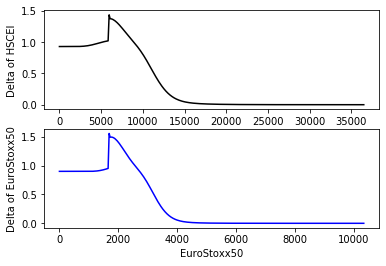

In [17]:
Plotting(X,Y,N = N, DeltaY = DeltaY, DeltaX= DeltaX, max_multiple = 3)

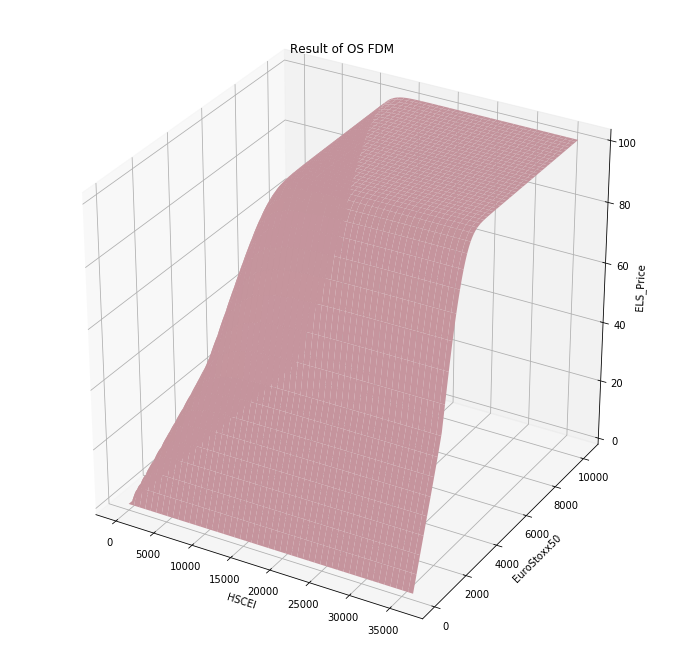

In [18]:
Plot_Price(X,Y,N,Price,max_multiple = 3, color = 'pink')

 # ELS Hedge

In [19]:
cd C:\Users\ciiad\주피터 파일\ELS_Hedge

C:\Users\ciiad\주피터 파일\ELS_Hedge


In [32]:
def ELS_Hedge(Hedge_Asset, Currency, Underlying_Price, Price, DeltaX, GammaX, DeltaY, GammaY,r_curve,
              max_multiple = 3, day_C_to_C = 130, Hedge_Period = 4 ) :

    F_EUROSTOXX = Hedge_Asset[Hedge_Asset.columns[0:1]]
    F_HSCEI = Hedge_Asset[Hedge_Asset.columns[1:2]]
    EURO_Currency = Currency[Currency.columns[0:1]]
    HDOLLAR_Currency = Currency[Currency.columns[1:2]]
    EUROSTOXX = Underlying_Price[Underlying_Price.columns[0]]
    HSCEI = Underlying_Price[Underlying_Price.columns[1]]    
    
    
    Return_EURO_Currency = (EURO_Currency[EURO_Currency.columns[0]].iloc[::Hedge_Period].pct_change().fillna(0))
    Return_HDOLLAR_Currency = (HDOLLAR_Currency[HDOLLAR_Currency.columns[0]].iloc[::Hedge_Period].pct_change().fillna(0))
    return_F_EUROSTOXX = F_EUROSTOXX.pct_change()
    return_F_HSCEI = F_HSCEI.pct_change()

    pp  =  day_C_to_C   # 6 M = 130days
    M   =  len(cr_ary) * pp
    Xmax, Xmin     = max_multiple * X       ,  0
    Ymax, Ymin     = max_multiple * Y       ,  0
    dx,   dy       = (Xmax - Xmin)/N        ,  (Ymax - Ymin)/N
    total_period = min(len(EUROSTOXX),len(HSCEI))
    
    Historical_Price = []
    Historical_DeltaX = []
    Historical_GammaX = []
    Historical_DeltaY = []
    Historical_GammaY = []
    for t , x , y in zip(range(total_period), np.array(EUROSTOXX.iloc[:total_period]//dx).reshape(-1).astype(int),  np.array(HSCEI.iloc[:total_period]//dy).reshape(-1).astype(int)) :
        Historical_Price.append(Price[::-1,:,:][t,y,x])
        Historical_DeltaX.append(DeltaX[::-1,:,:][t,y,x])
        Historical_GammaX.append(GammaX[::-1,:,:][t,y,x])
        Historical_DeltaY.append(DeltaY[::-1,:,:][t,y,x])
        Historical_GammaY.append(GammaY[::-1,:,:][t,y,x])
        
    My_ELSBOOK = pd.DataFrame([], index = Underlying_Price.index)
    My_ELSBOOK['ELS_Value'] = np.array(Historical_Price)
    My_ELSBOOK['ELS_DeltaX'] = np.array(Historical_DeltaX)
    My_ELSBOOK['ELS_GammaX'] = np.array(Historical_GammaX)
    My_ELSBOOK['ELS_DeltaY'] = np.array(Historical_DeltaY)
    My_ELSBOOK['ELS_GammaY'] = np.array(Historical_GammaY)
    My_ELSBOOK['ELS_Effective_Del_X'] = My_ELSBOOK['ELS_DeltaX'] + My_ELSBOOK['ELS_GammaX']
    My_ELSBOOK['ELS_Effective_Del_Y'] = My_ELSBOOK['ELS_DeltaY'] + My_ELSBOOK['ELS_GammaY']
    My_ELSBOOK['Interest_Revenue'] = My_ELSBOOK['ELS_Value'].iloc[0] * ((1+pd.Series(My_ELSBOOK.index,index = My_ELSBOOK.index).diff().apply(lambda x: x.days).fillna(0) / 365 * r_curve[0]).cumprod(0) -1)
    My_ELSBOOK_HP = My_ELSBOOK.iloc[::Hedge_Period]
    ELS_Profit = -My_ELSBOOK_HP['ELS_Value'].diff().fillna(0).cumsum(0)
    
    My_HedgeBOOK = pd.DataFrame([],index = Underlying_Price.index[::Hedge_Period], columns = ['XPosition'])
    My_HedgeBOOK['XPosition'] , My_HedgeBOOK['YPosition'] = 0,0
    My_HedgeBOOK['Additional_X'] = [(My_ELSBOOK_HP['ELS_Value'] * My_ELSBOOK_HP['ELS_Effective_Del_X']).iloc[0]]+[np.nan]*(len(My_HedgeBOOK)-1)
    My_HedgeBOOK['Additional_Y'] = [(My_ELSBOOK_HP['ELS_Value'] * My_ELSBOOK_HP['ELS_Effective_Del_Y']).iloc[0]]+[np.nan]*(len(My_HedgeBOOK)-1)
    My_HedgeBOOK['TotalX'] , My_HedgeBOOK['TotalY'] = 0,0
    My_HedgeBOOK['TotalX'].iloc[0] , My_HedgeBOOK['TotalY'].iloc[0] = My_HedgeBOOK['Additional_X'].iloc[0],My_HedgeBOOK['Additional_Y'].iloc[0]
    for i in range(len(My_HedgeBOOK)-1) :
        My_HedgeBOOK['XPosition'].iloc[i+1] = My_HedgeBOOK['TotalX'].iloc[i]
        My_HedgeBOOK['YPosition'].iloc[i+1] = My_HedgeBOOK['TotalY'].iloc[i]

        My_HedgeBOOK['Additional_X'].iloc[i+1] = (My_ELSBOOK_HP['ELS_Value'] * My_ELSBOOK_HP['ELS_Effective_Del_X']).iloc[i+1] - My_HedgeBOOK['XPosition'].iloc[i+1]
        My_HedgeBOOK['Additional_Y'].iloc[i+1] = (My_ELSBOOK_HP['ELS_Value'] * My_ELSBOOK_HP['ELS_Effective_Del_Y']).iloc[i+1] - My_HedgeBOOK['YPosition'].iloc[i+1]

        My_HedgeBOOK['TotalX'].iloc[i+1] = My_HedgeBOOK['XPosition'].iloc[i+1] + My_HedgeBOOK['Additional_X'].iloc[i+1]
        My_HedgeBOOK['TotalY'].iloc[i+1] = My_HedgeBOOK['YPosition'].iloc[i+1] + My_HedgeBOOK['Additional_Y'].iloc[i+1]
    My_HedgeBOOK['Daily_ProfitX'] = (My_HedgeBOOK['XPosition'] * return_F_EUROSTOXX.iloc[::Hedge_Period][return_F_EUROSTOXX.columns[0]]).fillna(0) * (1+Return_EURO_Currency)
    My_HedgeBOOK['Daily_ProfitY'] = (My_HedgeBOOK['YPosition'] * return_F_HSCEI.iloc[::Hedge_Period][return_F_HSCEI.columns[0]]).fillna(0) * (1+Return_HDOLLAR_Currency)
    My_HedgeBOOK['Interest_Expense'] = (My_HedgeBOOK['TotalX'] + My_HedgeBOOK['TotalY']).iloc[0] * ((1+pd.Series(My_HedgeBOOK.index,index = My_HedgeBOOK.index).diff().apply(lambda x: x.days).fillna(0) / 365 * r_curve[0]).cumprod(0) -1)
    My_HedgeBOOK['Total_Hedge_Profit'] = My_ELSBOOK_HP['Interest_Revenue'] + ELS_Profit + My_HedgeBOOK['Daily_ProfitX'].cumsum(0) + My_HedgeBOOK['Daily_ProfitY'].cumsum(0) - My_HedgeBOOK['Interest_Expense']    
    return My_HedgeBOOK

In [33]:
Hedge_Asset = pd.read_excel('HedgeAsset.xlsx', index_col = 0)
Currency = pd.read_excel('Currency_Data.xlsx',index_col=0)
Underlying_Price = pd.read_excel('가격데이터.xlsx',index_col = 0)

In [37]:
Hedge_Book  = ELS_Hedge(Hedge_Asset, Currency, Underlying_Price, Price, DeltaX, GammaX, DeltaY, GammaY,
                        r_curve,max_multiple = 3, day_C_to_C = 130, Hedge_Period = 4 ) 
Hedge_Book

,XPosition,YPosition,Additional_X,Additional_Y,TotalX,TotalY,Daily_ProfitX,Daily_ProfitY,Interest_Expense,Total_Hedge_Profit
Symbol Name,,,,,,,,,,
2018-06-08,0.000000,0.000000,25.201481,30.395381,25.201481,30.395381,0.000000,0.000000,0.000000,0.000000
2018-06-14,25.201481,30.395381,-4.582936,2.789427,20.618544,33.184807,0.392888,-0.258980,0.018278,-0.216401
2018-06-20,20.618544,33.184807,4.593989,8.504735,25.212533,41.689542,0.063558,0.044393,0.036563,2.323006
2018-06-26,25.212533,41.689542,2.539585,6.352574,27.752119,48.042116,0.000000,-0.135400,0.054853,4.279331
2018-07-02,27.752119,48.042116,-0.000957,0.429722,27.751161,48.471839,-0.238571,0.000000,0.073150,3.875698
...,...,...,...,...,...,...,...,...,...,...
2019-09-23,10.258542,75.996004,0.157120,6.046747,10.415663,82.042751,-0.086782,-0.917327,1.456426,2.671523
2019-09-27,10.415663,82.042751,0.065230,2.909205,10.480892,84.951956,0.038398,-0.402960,1.468931,3.051624
2019-10-03,10.480892,84.951956,3.200134,1.121462,13.681026,86.073418,-0.006177,0.629555,1.487693,3.118041
